In [30]:
import sys
sys.path.append('../implementation/')
import ast
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.special as sp
from tqdm import tqdm
import time
from monadjemi_competing_models import CompetingModels
import warnings
warnings.filterwarnings('ignore')

In [31]:
# Loading the Zeng underlying data and user interaction data
underlying_data = pd.read_csv('../data/zheng/combinations.csv')
underlying_data.set_index('id', drop=True, inplace=True)
output_file_path = '../output/zheng/zheng_map_results_competing_models.pkl'
ks = [1, 5, 10, 20, 50, 100]
interaction_data = pd.read_csv('../data/zheng/competing_movies_interactions.csv')
# Filter rows where 'user' column ends with 'p4_logs'
interaction_data = interaction_data[interaction_data['user'].str.endswith('p4_logs')]
interaction_data['interaction_session'] = interaction_data.apply(lambda row: ast.literal_eval(row.interaction_session), axis=1)

# interaction_data['interaction_type_session'] = interaction_data.apply(lambda row: ast.literal_eval(row.interaction_type_session), axis=1) #change string 'click' to click

In [32]:
d_attrs = ['mark','x_attribute','y_attribute']

In [33]:
underlying_data

,mark,x_attribute,y_attribute
id,,,
0,point,Title,Title
1,point,Title,US_Gross
2,point,Title,Worldwide_Gross
3,point,Title,US_DVD_Sales
4,point,Title,Production_Budget
...,...,...,...
1151,NaN,NaN,Director
1152,NaN,NaN,Rotten_Tomatoes_Rating
1153,NaN,NaN,IMDB_Rating


In [34]:
interaction_data

,user,interaction_session
3,stu29_ade_p4_logs,"[672, 672, 672, 672, 345, 345, 345, 345, 345, ..."
5,stu26_ace_p4_logs,"[97, 97, 97, 97, 389, 389, 389, 389, 389, 389,..."
6,pro8_acf_p4_logs,"[95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 9..."
7,pro20_ade_p4_logs,"[328, 328, 328, 328, 328, 328, 328, 328, 328, ..."
11,stu36_adf_p4_logs,"[9, 9, 9, 9, 9, 9, 9, 9, 9, 2, 2, 2, 2, 291, 2..."
13,stu21_ace_p4_logs,"[489, 489, 506, 506, 506, 506, 506, 506, 236, ..."
18,pro15_ade_p4_logs,"[759, 759, 440, 440, 508, 508, 406, 406, 406, ..."
20,stu39_adf_p4_logs,"[335, 335, 335, 335, 335, 335, 335, 335, 335, ..."
21,stu37_adf_p4_logs,"[20, 19, 37, 37, 19, 19, 19, 19, 19, 19, 19, 1..."
23,stu6_acf_p4_logs,"[235, 64, 12, 12, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9..."


In [38]:
competing_models = CompetingModels(underlying_data, [], d_attrs)

8 competing models enumerated.


In [39]:
competing_models.update(328)

In [40]:
competing_models.predict()

0       3.456636e-16
1       3.456636e-16
2       3.456636e-16
3       3.456636e-16
4       3.456636e-16
            ...     
1151             inf
1152             inf
1153             inf
1154             inf
1155             inf
Name: probability, Length: 1156, dtype: float64

In [37]:
interaction_index = 3 #only try user 2

competing_models = CompetingModels(underlying_data, [], d_attrs)
ks = [1, 5, 10, 20, 50, 100]
predicted = pd.DataFrame()
print(f'Total interactions: {len(interaction_data.iloc[interaction_index].interaction_session)}')
for i in tqdm(range(len(interaction_data.iloc[interaction_index].interaction_session))):
    interaction = interaction_data.iloc[interaction_index].interaction_session[i]
    print(interaction)
    competing_models.update(interaction)
    
    if i < len(interaction_data.iloc[interaction_index].interaction_session) - 1:
        probability_of_next_point = competing_models.predict()
        next_point = interaction_data.iloc[interaction_index].interaction_session[i+1]
        predicted_next_dict = {}
       # print( "predicted", next_point,probability_of_next_point.nlargest(1).index.values)
        for k in ks:

            predicted_next_dict[k] = (next_point in probability_of_next_point.nlargest(k).index.values)
        predicted = pd.concat([predicted, pd.DataFrame(predicted_next_dict, index=[0])], ignore_index=True)


8 competing models enumerated.
Total interactions: 676


  0%|          | 0/676 [00:00<?, ?it/s]

328


  0%|          | 1/676 [00:02<22:57,  2.04s/it]

328


  0%|          | 2/676 [00:03<22:18,  1.99s/it]

328


  0%|          | 3/676 [00:05<21:48,  1.94s/it]

328


  0%|          | 3/676 [00:06<26:06,  2.33s/it]


KeyboardInterrupt: 

In [29]:
interaction

328

In [15]:
probability_of_next_point.nlargest(1).index.values
underlying_data.loc[probability_of_next_point.nlargest(1).index.values]

,mark,x_attribute,y_attribute
id,,,
16,point,Title,NaN


In [24]:
data=underlying_data.loc[probability_of_next_point.nlargest(1).index.values]

In [27]:
x=data['x_attribute'].values[0]

In [28]:
x

'Title'

<Axes: title={'center': 'user                                                    pro3_ace_p3_logs\ninteraction_session    [45, 43, 44, 44, 44, 44, 44, 44, 44, 42, 42, 4...\nName: 43, dtype: object'}>

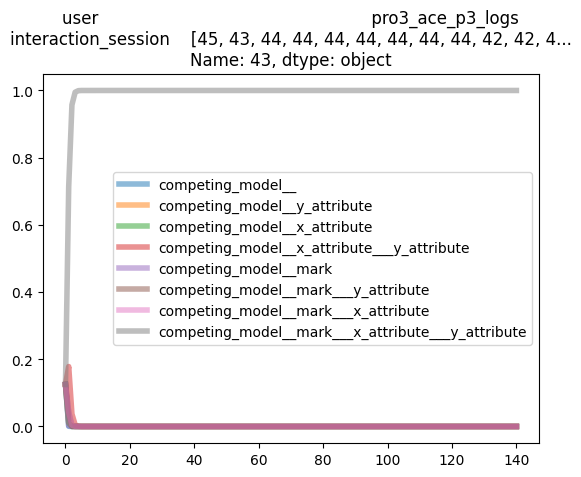

In [34]:
answer.plot(title=f'{interaction_data.iloc[interaction_index]}', alpha=0.5, lw=4)

In [36]:
competing_models.get_attribute_bias()

,mark,x_attribute,y_attribute
0,0.500000,0.500000,0.500000
1,0.800000,0.944444,0.944444
2,0.962406,0.998171,0.996350
3,0.995141,0.999960,0.999759
4,0.999466,0.999999,0.999992
...,...,...,...
136,1.000000,1.000000,1.000000
137,1.000000,1.000000,1.000000
138,1.000000,1.000000,1.000000
139,1.000000,1.000000,1.000000


In [37]:
predicted_next_dict

{1: False, 5: False, 10: False, 20: True, 50: True, 100: True}

In [38]:
# success rate for predicting next click in the top-k
ncp = predicted.sum()/len(predicted)
ncp

1      0.503597
5      0.575540
10     0.733813
20     0.834532
50     0.942446
100    0.964029
dtype: float64

In [8]:
# This blocks runs competing models on all sessions and records the outputs
# The results are saved to a file, so only need to run this block if you need new results

zeng_map_results = pd.DataFrame()
for participant_index, row in interaction_data.iterrows():
    print(f'Processing user {row.user}')
    results = {'participant_id': row.user}
    competing_models = CompetingModels(underlying_data, [], d_attrs)
    predicted = pd.DataFrame()
    rank_predicted = []

    for i in tqdm(range(len(interaction_data.iloc[participant_index].interaction_session))):
        interaction = interaction_data.iloc[participant_index].interaction_session[i]
        competing_models.update(interaction)

        if i < len(interaction_data.iloc[participant_index].interaction_session) - 1:
            probability_of_next_point = competing_models.predict()
            next_point = interaction_data.iloc[participant_index].interaction_session[i+1]
            predicted_next_dict = {}
            for k in ks:
                predicted_next_dict[k] = (next_point in probability_of_next_point.nlargest(k).index.values)
            predicted = pd.concat([predicted, pd.DataFrame([predicted_next_dict])], ignore_index=True)
            sorted_prob = probability_of_next_point.sort_values(ascending=False)
            rank, = np.where(sorted_prob.index.values == next_point)
            rank_predicted.append(rank[0] + 1)
            
    ncp = predicted.sum()/len(predicted)
    results['rank'] = rank_predicted

    for col in ncp.index:
        results[f'ncp-{col}'] = ncp[col]
        
    bias = competing_models.get_attribute_bias()
    for col in bias.columns:
        results[f'bias-{col}'] = bias[col].to_numpy()
        
    posterior = competing_models.get_model_posterior()
    for col in posterior.columns:
        results[f'posterior-{col}'] = posterior[col].to_numpy()

     # Append the results to the zeng_map_results DataFrame
    zeng_map_results = zeng_map_results.append(results, ignore_index=True)
    zeng_map_results.to_pickle(output_file_path)
    


Processing user stu29_ade_p4_logs
8 competing models enumerated.


100%|██████████| 676/676 [20:41<00:00,  1.84s/it]


Processing user stu26_ace_p4_logs
8 competing models enumerated.


100%|██████████| 42/42 [01:14<00:00,  1.78s/it]


Processing user pro8_acf_p4_logs
8 competing models enumerated.


100%|██████████| 208/208 [06:17<00:00,  1.82s/it]


Processing user pro20_ade_p4_logs
8 competing models enumerated.


100%|██████████| 1634/1634 [49:41<00:00,  1.82s/it]


Processing user stu36_adf_p4_logs
8 competing models enumerated.


100%|██████████| 636/636 [19:19<00:00,  1.82s/it]


Processing user stu21_ace_p4_logs
8 competing models enumerated.


100%|██████████| 337/337 [10:13<00:00,  1.82s/it]


Processing user pro15_ade_p4_logs
8 competing models enumerated.


100%|██████████| 357/357 [10:49<00:00,  1.82s/it]


Processing user stu39_adf_p4_logs
8 competing models enumerated.


100%|██████████| 3603/3603 [1:49:35<00:00,  1.83s/it]


Processing user stu37_adf_p4_logs
8 competing models enumerated.


100%|██████████| 1058/1058 [32:08<00:00,  1.82s/it]


Processing user stu6_acf_p4_logs
8 competing models enumerated.


100%|██████████| 826/826 [25:05<00:00,  1.82s/it]


Processing user pro31_adf_p4_logs
8 competing models enumerated.


100%|██████████| 419/419 [12:43<00:00,  1.82s/it]


Processing user stu13_acf_p4_logs
8 competing models enumerated.


100%|██████████| 804/804 [24:24<00:00,  1.82s/it]


Processing user pro29_ace_p4_logs
8 competing models enumerated.


100%|██████████| 668/668 [20:17<00:00,  1.82s/it]


Processing user stu38_acf_p4_logs
8 competing models enumerated.


100%|██████████| 332/332 [10:04<00:00,  1.82s/it]


Processing user stu7_ade_p4_logs
8 competing models enumerated.


100%|██████████| 3785/3785 [1:55:01<00:00,  1.82s/it]


Processing user stu31_ade_p4_logs
8 competing models enumerated.


100%|██████████| 137/137 [04:08<00:00,  1.81s/it]


Processing user pro13_ace_p4_logs
8 competing models enumerated.


100%|██████████| 724/724 [21:59<00:00,  1.82s/it]


Processing user stu15_ade_p4_logs
8 competing models enumerated.


100%|██████████| 1335/1335 [40:46<00:00,  1.83s/it]


Processing user pro9_acf_p4_logs
8 competing models enumerated.


IndexError: single positional indexer is out-of-bounds

In [ ]:
zeng_map_results.to_pickle(output_file_path)

In [9]:
zeng_map_results = pd.read_pickle(output_file_path)

In [22]:
len(zeng_map_results)

18

In [17]:
len(zeng_map_results['bias-mark'
][0])

677

IndexError: index 6 is out of bounds for axis 0 with size 6

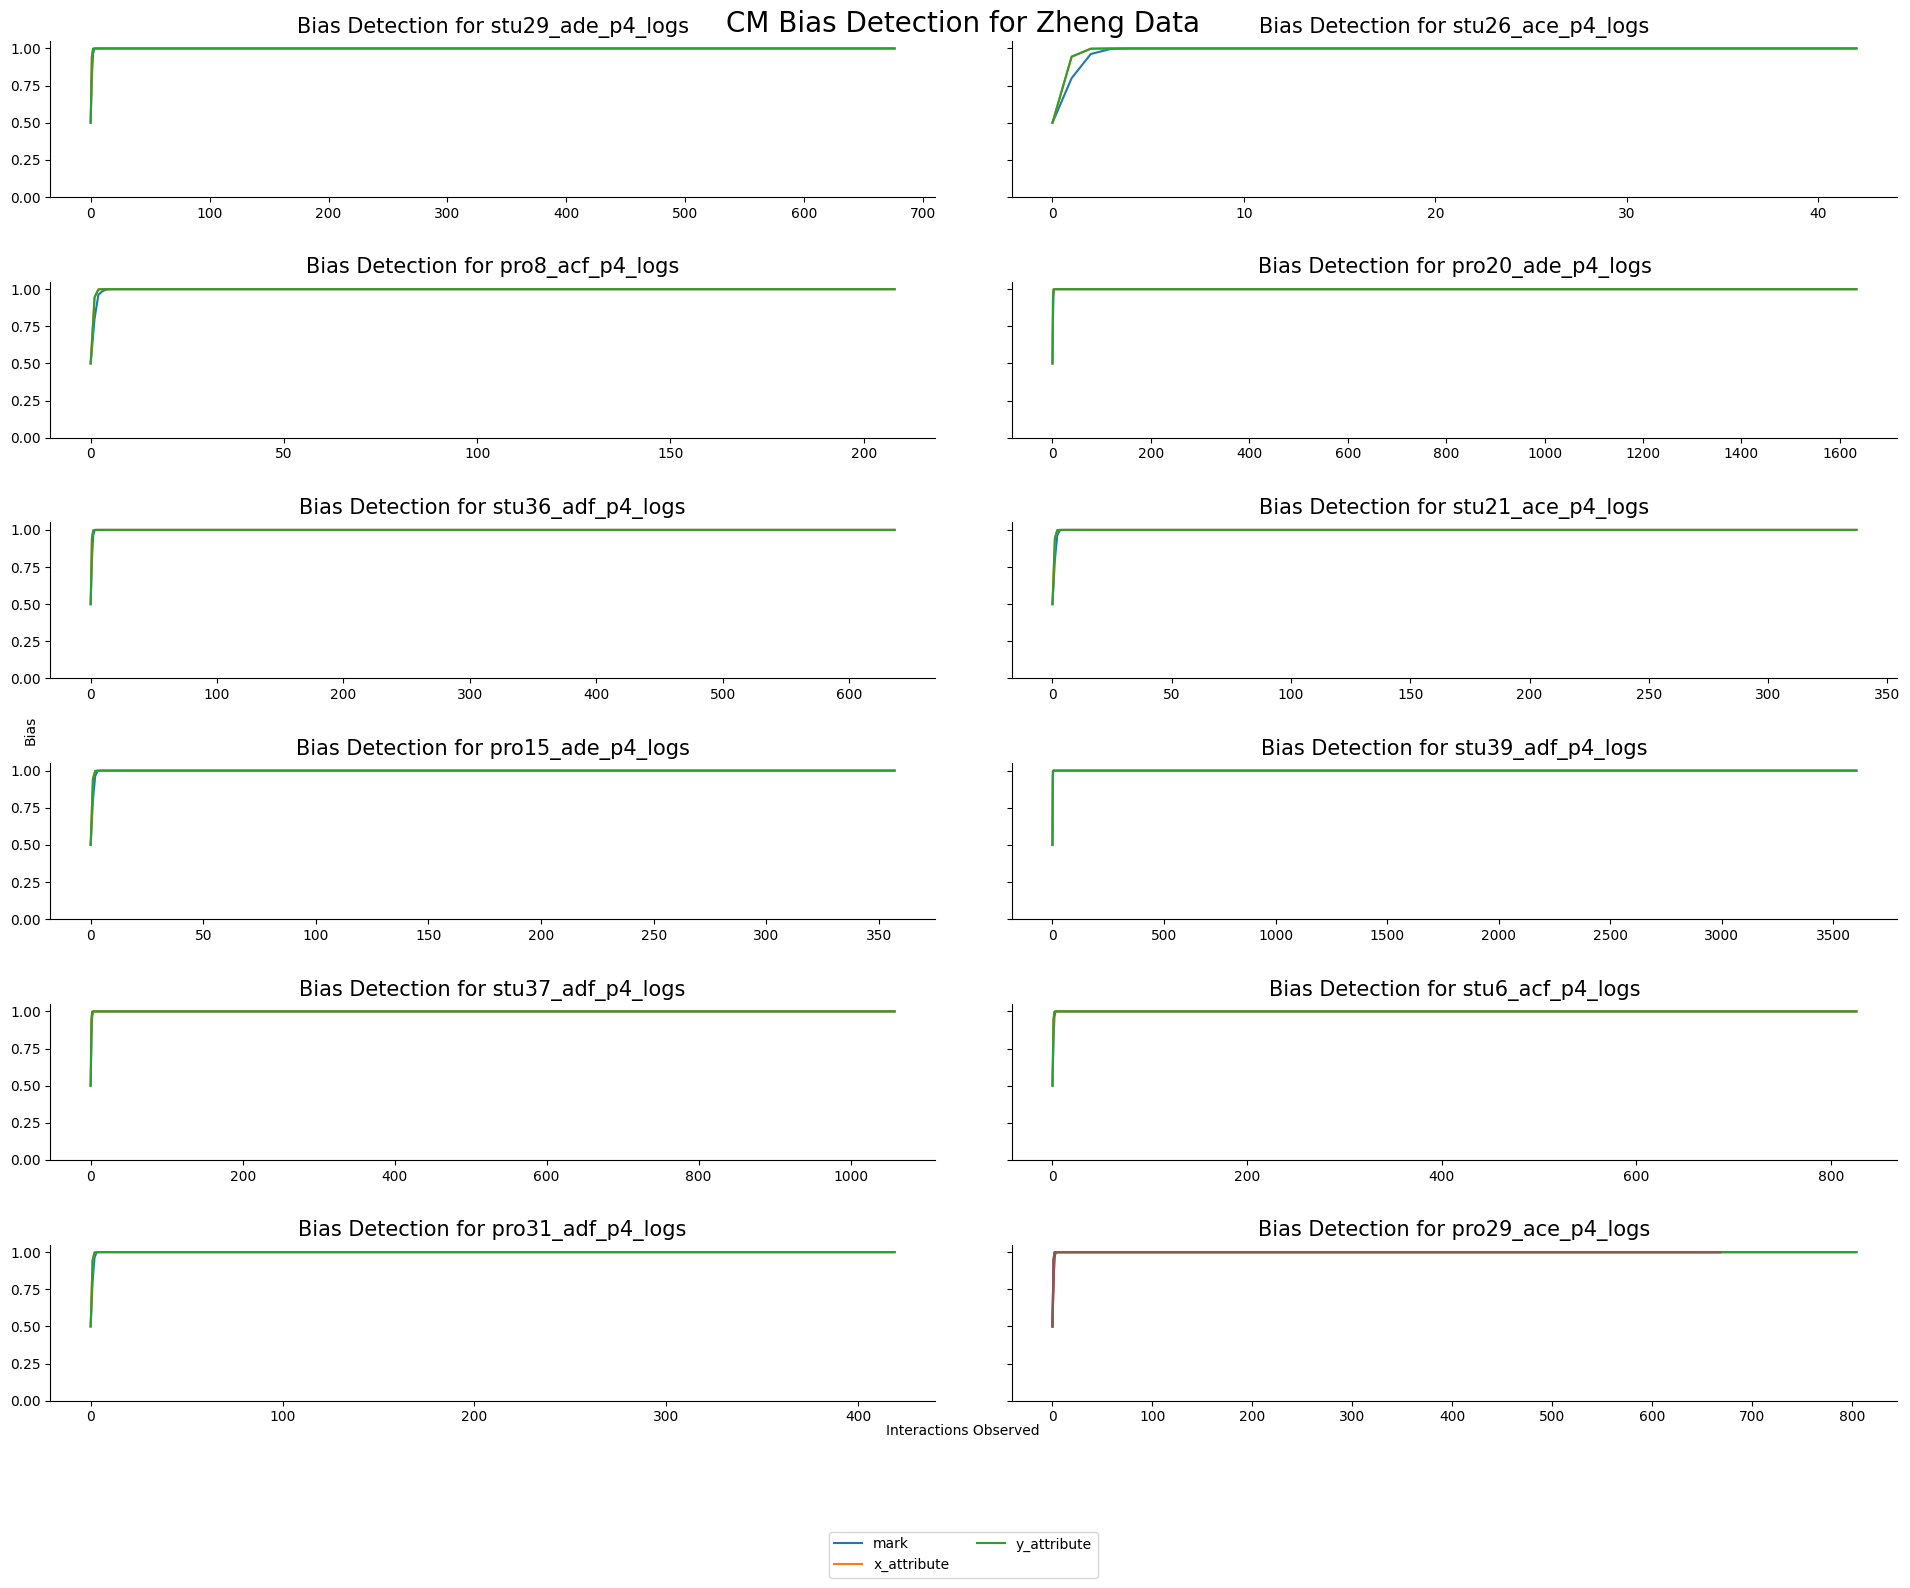

In [18]:
fig, axs = plt.subplots(6, 2, sharey=True, figsize=(20, 15))
fig.tight_layout(pad=4)
fig.suptitle('CM Bias Detection for Zheng Data', fontsize=20)
fig.text(0.5, 0.03, 'Interactions Observed', ha='center')
fig.text(0.03, 0.5, 'Bias', va='center', rotation='vertical')
plt.rcParams.update({'axes.titlesize': 15, 'axes.labelsize': 15,
                     'xtick.labelsize':12, 'xtick.labelsize':12})
for (m,n), ax in np.ndenumerate(axs):
    ax.set_ylim((0, 1.05))
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_color('black')
    ax.spines['bottom'].set_color('black')

bias_metric_per_task = {'y_attribute': 'bias-y_attribute', 'x_attribute': 'bias-x_attribute', 'mark': 'bias-mark'}
index_1 = 0
index_2 = 0
for index, row in zeng_map_results.iterrows():
    bias_over_time= pd.DataFrame()
    for ai, attr in enumerate(d_attrs):
        temp_df = pd.DataFrame()
        temp_df[row['participant_id']] = row[bias_metric_per_task[attr]]
        bias_over_time = pd.concat([bias_over_time, temp_df], axis=1, ignore_index=True)
    bias_over_time.columns = d_attrs
    bias_over_time.plot(ax=axs[index_1, index_2], title=f'Bias Detection for {row["participant_id"]}', legend = 0)
    if index != 11:
        if (index_2 == 1):
            index_2 = 0
            index_1 += 1
        else:
            index_2 += 1
    else:
        handles, labels = axs[index_1, index_2].get_legend_handles_labels()
        n_cols = round(len(d_attrs)/2)
        fig.legend(handles, labels, loc='lower center', ncol=n_cols, bbox_to_anchor=(0.5, -0.07))

<Axes: title={'center': 'Aggregate Next Visualization Prediction for Zheng Data'}>

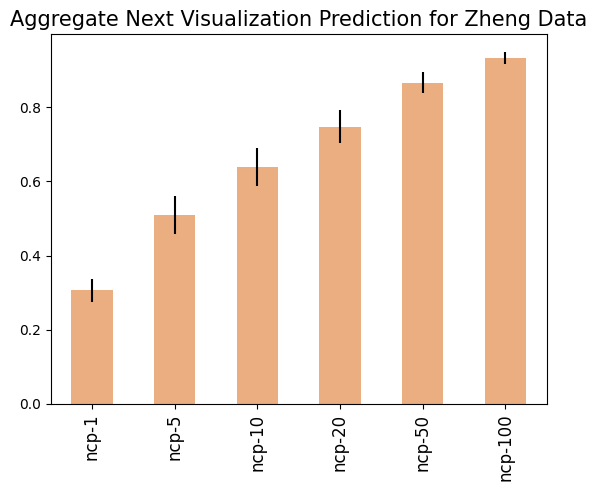

In [23]:
ks = [1, 5, 10, 20, 50, 100]

df_temp = zeng_map_results[[f'ncp-{k}' for k in ks]]
err = df_temp.std() / np.sqrt(len(df_temp))
df_temp.mean().plot.bar(yerr=err, color='#d95f02', alpha=0.5, title=f'Aggregate Next Visualization Prediction for Zheng Data')